<img src="AUEB.png" /> <img src="MSc_BA.png" />

# Athens University of Economics and Business
# School of Business
# Department of Management Science & Technology
# Master of Science in Business Analytics
___

<table style='float:left;font-size: 20px;'>
    <tr>
        <th style='text-align: left;'>Program:</th>
        <td style='text-align: left;'>Full-Time</td>
    </tr>
    <tr>
        <th style='text-align: left;'>Quarter:</th>
        <td style='text-align: left;'>2nd (Winter Quarter)</td>
    </tr>
    <tr>
        <th style='text-align: left;'>Course:</th>
        <td style='text-align: left;'>Analytics Practicum I</td>
    </tr>
    <tr>
        <th style='text-align: left;'>Assignment No:</th>
        <td style='text-align: left;'>1</td>
    </tr> 
    <tr>
        <th style='text-align: left;'>Student (Registration No):</th>
        <td style='text-align: left;'>Souflas Eleftherios-Efthymios (f2822217)</td>
    </tr>
</table>

___
# Economic Connectedness Assignment

In order to replicate all figures in this assignment, Python and some of its libraries were used.

In [62]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import plotly.express as px
from urllib.request import urlopen
import json
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import mean

### Q1: The Geography of Social Capital in the United States

Figure 2a of [Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital I: measurement and associations with economic mobility. Nature 608, 108–121 (2022)](https://www.nature.com/articles/s41586-022-04996-4) (first) paper maps Economic Connectedness (EC) by county in the United States (for more information about what is Economic Connectedness and how it was measured, please read the article mentioned above). EC varies significantly across areas. A replication of [Figure 2a](https://www.nature.com/articles/s41586-022-04996-4/figures/2) will be produced, but while the figure in the paper is static, an interactive figure, like the one that is available online at https://www.socialcapital.org/, will be produced.

All necessary datasets from [Social Capital Atlas Datasets](https://data.humdata.org/dataset/social-capital-atlas) were downloaded and imported. For Figure 2a only the `US Counties Dataset` is needed.

In [63]:
sc_college = pd.read_csv('Data/social_capital_college.csv')
sc_county = pd.read_csv('Data/social_capital_county.csv')
sc_highSchool = pd.read_csv('Data/social_capital_high_school.csv')
sc_zip = pd.read_csv('Data/social_capital_zip.csv')

A new Data Frame from the forementioned dataset was created to include all counties with its 5-digit county FIPS code, the name of the county and state, its measured economic connectedness and a label for categorizing all values into 10 categories (>1.06, 0.97-1.06, 0.90-0.97, 0.85-0.90, 0.81-0.85, 0.76-0.81, 0.72-0.76, 0.67-0.72, 0.58-0.67, <0.58) and a separate category for not available values (NA).

In [64]:
dataset1 = sc_county[["county","county_name","ec_county"]]
dataset1['county'] = dataset1['county'].astype(str)
dataset1['county'] = dataset1['county'].apply(lambda x: x.zfill(5))
dataset1['county_label'] = 'NA'
dataset1.loc[dataset1['ec_county'] < 0.58, 'county_label'] = '<0.58'
dataset1.loc[(dataset1['ec_county'] >= 0.58) & (dataset1['ec_county'] < 0.67), 'county_label'] = '0.58-0.67'
dataset1.loc[(dataset1['ec_county'] >= 0.67) & (dataset1['ec_county'] < 0.72), 'county_label'] = '0.67-0.72'
dataset1.loc[(dataset1['ec_county'] >= 0.72) & (dataset1['ec_county'] < 0.76), 'county_label'] = '0.72-0.76'
dataset1.loc[(dataset1['ec_county'] >= 0.76) & (dataset1['ec_county'] <= 0.81), 'county_label'] = '0.76-0.81'
dataset1.loc[(dataset1['ec_county'] > 0.81) & (dataset1['ec_county'] <= 0.85), 'county_label'] = '0.81-0.85'
dataset1.loc[(dataset1['ec_county'] > 0.85) & (dataset1['ec_county'] <= 0.90), 'county_label'] = '0.85-0.90'
dataset1.loc[(dataset1['ec_county'] > 0.90) & (dataset1['ec_county'] <= 0.97), 'county_label'] = '0.90-0.97'
dataset1.loc[(dataset1['ec_county'] > 0.97) & (dataset1['ec_county'] <= 1.06), 'county_label'] = '0.97-1.06'
dataset1.loc[dataset1['ec_county'] > 1.06, 'county_label'] = '>1.06'
dataset1.ec_county = round(dataset1.ec_county,2)
dataset1

,county,county_name,ec_county,county_label
0,01001,"Autauga, Alabama",0.72,0.72-0.76
1,01003,"Baldwin, Alabama",0.74,0.72-0.76
2,01005,"Barbour, Alabama",0.41,<0.58
3,01007,"Bibb, Alabama",0.63,0.58-0.67
4,01009,"Blount, Alabama",0.73,0.72-0.76
...,...,...,...,...
3084,56037,"Sweetwater, Wyoming",0.96,0.90-0.97
3085,56039,"Teton, Wyoming",1.08,>1.06
3086,56041,"Uinta, Wyoming",0.95,0.90-0.97
3087,56043,"Washakie, Wyoming",0.91,0.90-0.97


In order to depict all counties with their relevant coordinates on the US map, an available [Plotly Dataset (geojson)](https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json) was used. Because some counties were missing, as entire rows, in the `US Counties Dataset` downloaded in the previous step, those missing values were collected from the geojson file and concatenated with the Data Frame created above. Thus, from a 3089 rows DataFrame we ended up with a 3223 rows DataFrame. For the graph that in the next step is going to be created, colors from the [RdBu Diverging Colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#diverging) were used.

In [65]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
json_county = []
json_county_name = []
for i in range(len(counties['features'])):
    json_county.append(counties['features'][i]["id"])
    json_county_name.append(counties['features'][i]['properties']['NAME'])
df = pd.DataFrame(json_county, columns=['county_id'])
df["county_name"] = json_county_name
df["state_id"] = df["county_id"].str[:2]
df2 = pd.DataFrame()
df2["state_id"] = dataset1["county"].str[:2]
df2["state_name"] = dataset1['county_name'].str.rsplit(',').str[-1] 
df2 = df2.drop_duplicates(keep='first')
merged_df = pd.merge(df, df2, how="left", on="state_id")
to_insert = merged_df[~merged_df.county_id.isin(dataset1.county)]
to_insert['county_state'] = to_insert['county_name'].str.cat(to_insert['state_name'],sep=",")
to_insert['ec_county'] = np.nan
to_insert['county_label'] = 'NA'
dataset1 = pd.concat([dataset1, to_insert.iloc[:,[0,4,5,6]].rename(columns={'county_id':'county','county_state':'county_name'})], ignore_index=True)
dataset1["economic connectedness"] = dataset1.loc[:,"ec_county"].astype(str)
dataset1.loc[dataset1["economic connectedness"]=='nan','economic connectedness'] = 'NA'
print(px.colors.diverging.RdBu_r)
dataset1.iloc[:,[0,1,4,3]]

['rgb(5,48,97)', 'rgb(33,102,172)', 'rgb(67,147,195)', 'rgb(146,197,222)', 'rgb(209,229,240)', 'rgb(247,247,247)', 'rgb(253,219,199)', 'rgb(244,165,130)', 'rgb(214,96,77)', 'rgb(178,24,43)', 'rgb(103,0,31)']


,county,county_name,economic connectedness,county_label
0,01001,"Autauga, Alabama",0.72,0.72-0.76
1,01003,"Baldwin, Alabama",0.74,0.72-0.76
2,01005,"Barbour, Alabama",0.41,<0.58
3,01007,"Bibb, Alabama",0.63,0.58-0.67
4,01009,"Blount, Alabama",0.73,0.72-0.76
...,...,...,...,...
3218,72003,NaN,NA,NA
3219,72009,NaN,NA,NA
3220,72015,NaN,NA,NA
3221,51570,"Colonial Heights, Virginia",NA,NA


Finally, with the use of the DataFrame created above, the geojson file and the choropleth map (provided by plotly), an interactive Figure 2a of the forementioned article was created. For ease of use, a separate HTML file of the figure produced below, with the use of [plotly.io.write_html](https://plotly.com/python-api-reference/generated/plotly.io.html), has been produced [here](choropleth.html).

In [66]:
fig = px.choropleth(dataset1, geojson=counties, locations='county', color='county_label', 
                    category_orders = {"county_label":[">1.06",'0.97-1.06','0.90-0.97','0.85-0.90','0.81-0.85','0.76-0.81','0.72-0.76',
 '0.67-0.72','0.58-0.67','<0.58','NA']},
                    color_discrete_sequence=['rgb(5,48,97)', 'rgb(33,102,172)', 'rgb(67,147,195)', 'rgb(146,197,222)', 'rgb(209,229,240)', 'rgb(247,247,247)', 'rgb(253,219,199)', 'rgb(244,165,130)', 'rgb(214,96,77)', 'rgb(178,24,43)', 'yellow'],
                    scope="usa",
                    labels={'county_label':'Economic Connectedness'},
                    hover_name="county_name",
                    hover_data={'county':True, 'economic connectedness':True, 'county_label':False})
_= fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, legend=dict(y=0.5))
# The following line has been commented out for reduction of ipynb file
# fig.show()

### Q2: Economic Connectedness and Outcomes

[Figure 4](https://www.nature.com/articles/s41586-022-04996-4/figures/4) of the first paper, depicts a scatter plot of upward income mobility against economic connectedness (EC) together with a slope estimated using an ordinary least squares (OLS) regression on the 200 largest US counties by population. Upward income mobility is obtained from the [Opportunity Atlas](https://www.nber.org/papers/w25147) and is measured as the predicted household income rank in adulthood for children in the 1978–1983 birth cohorts with parents at the 25th percentile of the national income distribution.

Firstly, the 200 most populous counties were selected from the `Social Capital County Dataset` and stored into a separate Data Frame. Below the `most_populous` Data Frame is viewed with only the necessary columns required for the construction of the figure.

In [67]:
most_populous = sc_county[~sc_county.pop2018.isna()].sort_values(by=['pop2018'], ascending=False).iloc[:200,:]
most_populous.iloc[:,[0,1,4]]

,county,county_name,ec_county
203,6037,"Los Angeles, California",0.73580
605,17031,"Cook, Illinois",0.75869
2598,48201,"Harris, Texas",0.67668
102,4013,"Maricopa, Arizona",0.74400
221,6073,"San Diego, California",0.90846
...,...,...,...
2517,48039,"Brazoria, Texas",0.83867
357,12083,"Marion, Florida",0.62977
1310,27003,"Anoka, Minnesota",1.03045
2512,48027,"Bell, Texas",0.77036


Then, a Data Frame was created by importing only the needed (three) columns from the large (10827 columns) dataset of the `County Outcomes` which was downloaded from the [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/NKCQM1). The state and county codes were then merged into one column containing the county FIPS codes and transformed to integer, because the respective column of the 200-county Data Frame is integer. Below the `county_outcomes2` Data Frame is viewed with only the necessary columns required for the construction of the figure.

In [68]:
county_outcomes2 = pd.read_csv("Data/county_outcomes.csv", usecols = ['state','county','kfr_pooled_pooled_p25'])
county_outcomes2['state'] = county_outcomes2['state'].astype(str)
county_outcomes2['county'] = county_outcomes2['county'].astype(str)
county_outcomes2['county'] = county_outcomes2['county'].apply(lambda x: x.zfill(3))
county_outcomes2['state_county'] = county_outcomes2['state'].str.cat(county_outcomes2['county'],sep="")
print(most_populous.county.dtype)
county_outcomes2['state_county'] = county_outcomes2['state_county'].astype(int)
county_outcomes2.iloc[:,[3,2]]

int64


,state_county,kfr_pooled_pooled_p25
0,1001,0.361666
1,1003,0.388847
2,1005,0.349386
3,1007,0.363391
4,1009,0.391879
...,...,...
3214,72145,0.252577
3215,72147,NaN
3216,72149,0.212865
3217,72151,0.256017


Then, the two Data Frames were merged into one in order to be handled properly to create the figure. The merged Data Frame is presented below.

In [69]:
dataset2 = pd.merge(most_populous.iloc[:,[0,1,4]], county_outcomes2.iloc[:,[3,2]], how="left", left_on='county', right_on='state_county')
dataset2.drop('state_county', axis=1, inplace=True)
dataset2

,county,county_name,ec_county,kfr_pooled_pooled_p25
0,6037,"Los Angeles, California",0.73580,0.431230
1,17031,"Cook, Illinois",0.75869,0.384614
2,48201,"Harris, Texas",0.67668,0.418473
3,4013,"Maricopa, Arizona",0.74400,0.398581
4,6073,"San Diego, California",0.90846,0.425785
...,...,...,...,...
195,48039,"Brazoria, Texas",0.83867,0.451939
196,12083,"Marion, Florida",0.62977,0.374836
197,27003,"Anoka, Minnesota",1.03045,0.457203
198,48027,"Bell, Texas",0.77036,0.381505


Then, the 5 counties (New York, Salt Lake, San Fransisco, Hennepin (aka Minneapolis), Marion (aka Indianapolis)) annotated in the figure with arrow were selected, in order to find their respective Data Frame index for the figure to be able to be replicated. The five annotated counties are presented below.

In [70]:
# Annotation Counties starting clockwise from New York
# New York, Salt Lake, San Fransisco, Hennepin (aka Minneapolis), Marion (aka Indianapolis)
dataset2[dataset2['county_name'].str.contains('Marion', na=False)]
text = [20,38,62,33,50]
dataset2.iloc[text,:]

,county,county_name,ec_county,kfr_pooled_pooled_p25
20,36061,"New York, New York",0.82734,0.418693
38,49035,"Salt Lake, Utah",0.96395,0.454131
62,6075,"San Francisco, California",1.31244,0.503888
33,27053,"Hennepin, Minnesota",0.97632,0.428964
50,18097,"Marion, Indiana",0.64282,0.344080


Finally, the replicated figure with its relevant annotations is presented below.

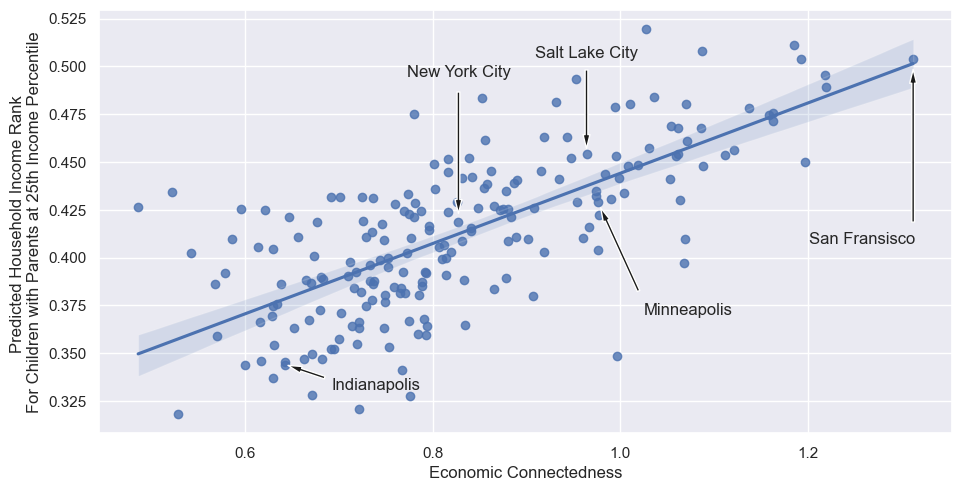

In [71]:
arrowprops=dict(fc='k', ec='w', headlength=10, headwidth=5, width=2, shrink=0.06)
sns.set_theme()
plt.figure(figsize=(11,5.5))
sns.regplot(data=dataset2, x='ec_county', y='kfr_pooled_pooled_p25')
plt.xlabel("Economic Connectedness")
plt.ylabel('Predicted Household Income Rank \nFor Children with Parents at 25th Income Percentile')
plt.annotate('New York City', xy=(dataset2.iloc[20,2], dataset2.iloc[20,3]), xytext=(0,102), 
            textcoords='offset points', ha='center', va='bottom',
            arrowprops=arrowprops)
plt.annotate('Salt Lake City', xy=(dataset2.iloc[38,2], dataset2.iloc[38,3]), xytext=(0,67), 
            textcoords='offset points', ha='center', va='bottom',
            arrowprops=arrowprops)
plt.annotate('San Fransisco', xy=(dataset2.iloc[62,2], dataset2.iloc[62,3]), xytext=(-37,-135), 
             textcoords='offset points', ha='center', va='bottom')
plt.annotate('', xy=(dataset2.iloc[62,2], dataset2.iloc[62,3]), xytext=(0,-125), 
            textcoords='offset points', ha='center', va='bottom',
            arrowprops=arrowprops)
plt.annotate('Minneapolis', xy=(dataset2.iloc[33,2], dataset2.iloc[33,3]), xytext=(65,-83), 
             textcoords='offset points', ha='center', va='bottom')
plt.annotate('', xy=(dataset2.iloc[33,2], dataset2.iloc[33,3]), xytext=(31,-68), 
            textcoords='offset points', ha='center', va='top',
            arrowprops=arrowprops)
plt.annotate('Indianapolis', xy=(dataset2.iloc[50,2], dataset2.iloc[50,3]), xytext=(65,-20), 
             textcoords='offset points', ha='center', va='bottom')
_ = plt.annotate('', xy=(dataset2.iloc[50,2], dataset2.iloc[50,3]), xytext=(30,-10), 
            textcoords='offset points', ha='center', va='top',
            arrowprops=arrowprops)

### Q3: Upward Income Mobility, Economic Connectedness, and Median House Income 

[Figure 6 of the first paper](https://www.nature.com/articles/s41586-022-04996-4/figures/6) is a scatter plot of economic connectedness (EC) against median household income, depicting also the child's income rank in adulthood given that the parents' income is in the 25th percentile. In order to replicate this figure, [data from replication package of the first paper](https://opportunityinsights.org/data/?geographic_level=0&topic=0&paper_id=0#resource-listing) with data from the Social Capital Atlas Datasets downloaded before (`sc_zip`) were compiled. From replication package, the `zip_covariates.dta` file was used and from this file only the columns depicting ZIP Code, Median Household Income (based on the 2014–2018 American Community Survey) and the Predicted Household Income Rank (Upward Mobility) in adulthood (for children in the 1978–1983 birth cohorts with parents at the 25th percentile of the national income distribution) were used.

In [72]:
# https://opportunityinsights.org/wp-content/uploads/2022/08/social_capital_replication.zip
data3b = pd.read_stata('Data/zip_covariates.dta')
data3b.loc[:,['zip','med_inc_2018','kfr_pooled_pooled_p25']]

,zip,med_inc_2018,kfr_pooled_pooled_p25
0,36006,47148.0,0.375984
1,36067,53578.0,0.351230
2,36749,37054.0,0.356113
3,36066,62089.0,0.404268
4,36051,69423.0,0.360447
...,...,...,...
32812,82442,55733.0,0.492363
32813,82401,52988.0,0.460857
32814,82730,41667.0,0.499194
32815,82701,55192.0,0.482879


From the `sc_zip` Data Frame, the columns depicting the ZIP Code (in order to be merged with the previous dataset) and the EC measure of it were used.

In [73]:
sc_zip.iloc[:,[0,4]]

,zip,ec_zip
0,1001,0.88157
1,1002,1.18348
2,1003,1.37536
3,1005,1.15543
4,1007,1.19240
...,...,...
23023,99901,0.99517
23024,99921,0.87977
23025,99925,NaN
23026,99926,0.87888


Then, the two datasets were merged into one and all rows containing missing values in the forementioned columns were dropped. After that, a new column containing a label grouping Upward Mobility into five intervals (quintiles) was created assigning each row's value to the corresponding label (um_label).

In [74]:
dataset3b = pd.merge(sc_zip.iloc[:,[0,4]], data3b.loc[:,['zip','med_inc_2018','kfr_pooled_pooled_p25']], how='inner', on='zip') # 23019 rows
dataset3b = dataset3b.loc[~dataset3b.loc[:,'ec_zip'].isna(),:] # 18978 rows
dataset3b = dataset3b.loc[~dataset3b.loc[:,'med_inc_2018'].isna(),:] # 18914 rows
dataset3b = dataset3b.loc[~dataset3b.loc[:,'kfr_pooled_pooled_p25'].isna(),:] # 18913 rows
dataset3b['um_label'] = ''
dataset3b.loc[dataset3b['kfr_pooled_pooled_p25'] <= 0.38, 'um_label'] = '<38'
dataset3b.loc[(dataset3b['kfr_pooled_pooled_p25'] > 0.38) & (dataset3b['kfr_pooled_pooled_p25'] <= 0.41), 'um_label'] = '38-41'
dataset3b.loc[(dataset3b['kfr_pooled_pooled_p25'] > 0.41) & (dataset3b['kfr_pooled_pooled_p25'] <= 0.44), 'um_label'] = '41-44'
dataset3b.loc[(dataset3b['kfr_pooled_pooled_p25'] > 0.44) & (dataset3b['kfr_pooled_pooled_p25'] <= 0.48), 'um_label'] = '44-48'
dataset3b.loc[dataset3b['kfr_pooled_pooled_p25'] > 0.48, 'um_label'] = '>48'
dataset3b

,zip,ec_zip,med_inc_2018,kfr_pooled_pooled_p25,um_label
0,1001,0.88157,62144.0,0.468741,44-48
1,1002,1.18348,55858.0,0.475851,44-48
3,1005,1.15543,68278.0,0.407809,38-41
4,1007,1.19240,93300.0,0.476621,44-48
6,1010,0.73856,84471.0,0.492584,>48
...,...,...,...,...,...
23013,99840,1.11489,72237.0,0.485863,>48
23014,99901,0.99517,70356.0,0.404646,38-41
23015,99921,0.87977,58571.0,0.294530,<38
23017,99926,0.87888,53409.0,0.277356,<38


Finally, the replicated figure is:

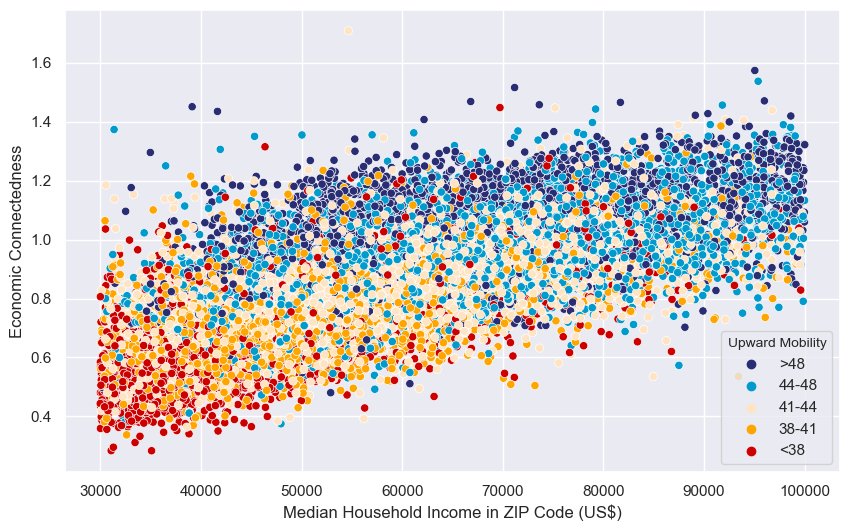

In [75]:
plt.figure(figsize=(10,6))
# palette = {'>48':"#373582",'44-48':"#0E86D4",'41-44':"#ffe3c0",'38-41':"orange",'<38':"#d72839"}
# palette = {'>48':"#191970",'44-48':"#009ACD",'41-44':"#FFE4C4",'38-41':"#FFA500",'<38':"#CD0000"}
palette = {'>48':"#292D73",'44-48':"#009ACD",'41-44':"#FFE4C4",'38-41':"#FFA500",'<38':"#CD0000"}
sns.scatterplot(data=dataset3b[dataset3b['med_inc_2018'].between(30000, 100000)], x="med_inc_2018", y="ec_zip", 
                hue="um_label", hue_order=['>48','44-48','41-44','38-41','<38'], palette=palette)
                #'bwr')
plt.xlabel('Median Household Income in ZIP Code (US$)')
plt.ylabel("Economic Connectedness")
legend = plt.legend(title='Upward Mobility', loc=4)
_= plt.setp(legend.get_title(),fontsize='small')

### Q4: Friending Bias and Exposure by High School

In order to replicate [Figure 5a](https://www.nature.com/articles/s41586-022-04997-3/figures/5) of the [second paper](https://www.nature.com/articles/s41586-022-04997-3), which depicts mean friending bias among students with low parental SES versus the share of students with high parental SES by High School, the `US High Schools.csv` of the Social Capital Atlas is needed and especially the columns:
* `exposure_parent_ses_hs` divided by 2
* `bias_parent_ses_hs`

multiplied with 100 in order to have the percentage scale.

In [76]:
sc_highSchool.loc[:,"share_parent_ses_hs"] = 100 * sc_highSchool.exposure_parent_ses_hs / 2
sc_highSchool.loc[:,"fr_bias_parent_ses_hs"] = 100 * sc_highSchool.bias_parent_ses_hs
sc_highSchool.loc[:,['high_school','high_school_name','share_parent_ses_hs','fr_bias_parent_ses_hs']]

,high_school,high_school_name,share_parent_ses_hs,fr_bias_parent_ses_hs
0,00000044,Holy Spirit Catholic School,NaN,NaN
1,00000226,John Carroll Catholic HS,72.1295,0.285
2,00000237,Holy Family Cristo Rey Catholic HS,NaN,NaN
3,00000714,Montgomery Catholic Preparatory School,NaN,NaN
4,00000758,St Paul's Episcopal School,78.7570,-0.050
...,...,...,...,...
17520,Y2121679,St Agnes Academy-St Dominic School,NaN,NaN
17521,Z0516931,Sayre School,NaN,NaN
17522,Z1326859,Fort Worth Christian School,NaN,NaN
17523,Z1326892,Second Baptist School,NaN,NaN


A list with the high schools of the forementioned figure is created and an instance of the high school Data Frame containing these high schools only is presented in order to use their index for annotating them in the figure.

In [77]:
schools = ['00941729', '060474000432', '170993000942', '170993001185', '170993003989', '171449001804', '250327000436', '360009101928', '370297001285', '483702004138', '250843001336', '062271003230', '010237000962', '00846981', '00852124']
schools_index = sc_highSchool.loc[sc_highSchool['high_school'].isin(schools),:].index
sc_highSchool.loc[sc_highSchool['high_school'].isin(schools),['high_school','high_school_name']]

,high_school,high_school_name
797,00846981,Bishop Gorman HS
805,00852124,Phillips Exeter Academy
987,00941729,Dalton School
1273,010237000962,John L Leflore Magnet School
2662,060474000432,Berkeley HS
3041,062271003230,North Hollywood Sr HS
5266,170993000942,Lane Technical HS
5285,170993001185,Lincoln Park HS
5294,170993003989,Payton College Preparatory HS
5403,171449001804,Evanston Twp HS


The replicated figure, with the $x$ and $y$ axis and the annotated high schools as in the plot provided as standard for replication, is shown below.

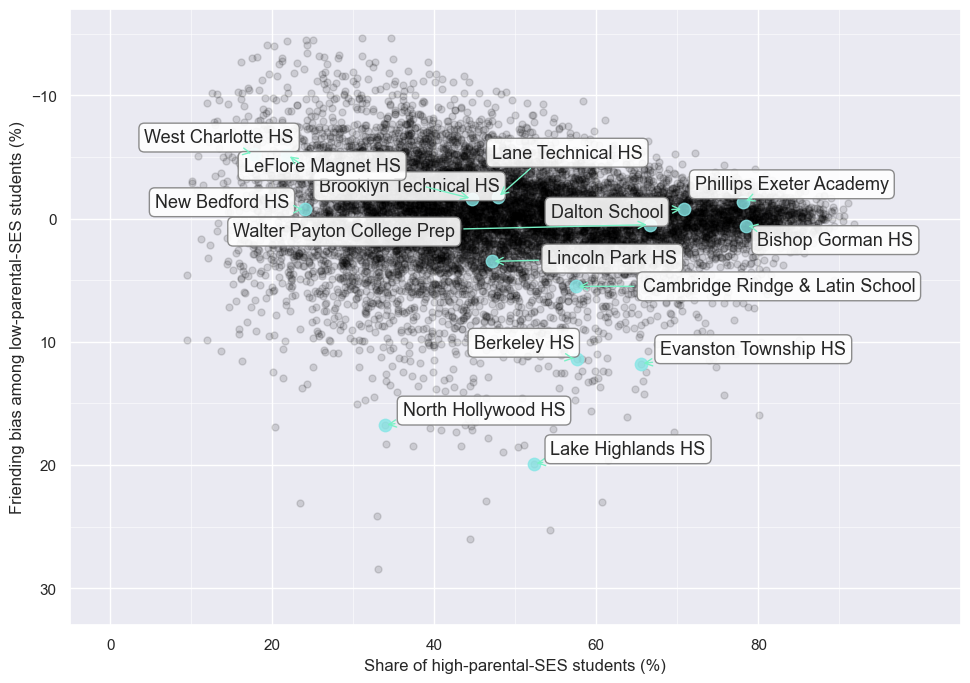

In [78]:
fig, ax = plt.subplots(figsize=(11.5,8))
sns.scatterplot(ax=ax, data=sc_highSchool[sc_highSchool['fr_bias_parent_ses_hs'].between(-15,30)], alpha=0.13, s=25,
                x="share_parent_ses_hs", y="fr_bias_parent_ses_hs", color='black', edgecolor="black", linewidth = 1)
ax.set_xlim(-5, 105)
ax.set_ylim(33, -17)
ax.set_xticks([0, 20, 40, 60, 80], labels=['0', '20', '40', '60', '80'])
ax.get_xaxis().set_minor_locator(mpl.ticker.FixedLocator([10, 30, 50, 70, 90]))
ax.get_yaxis().set_minor_locator(mpl.ticker.MultipleLocator(5))
ax.grid(visible=True, which='major', color='w', linewidth=1.0)
ax.grid(visible=True, which='minor', color='w', linewidth=0.4)
plt.xlabel('Share of high-parental-SES students (%)')
plt.ylabel("Friending bias among low-parental-SES students (%)")
def f(x):
    return plt.scatter(sc_highSchool.iloc[x,21], sc_highSchool.iloc[x,22], color='#87E6E6', alpha=.8, s=80)
list(map(f, schools_index))
plt.annotate('Lincoln Park HS', xy=(sc_highSchool.iloc[5285,21], sc_highSchool.iloc[5285,22]), xytext=(40,2), 
            textcoords='offset points', ha='left', va='center', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('West Charlotte HS', xy=(sc_highSchool.iloc[11507,21], sc_highSchool.iloc[11507,22]), xytext=(-25,5), 
            textcoords='offset points', ha='center', va='bottom', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9))
plt.annotate('Brooklyn Technical HS', xy=(sc_highSchool.iloc[10480,21], sc_highSchool.iloc[10480,22]), xytext=(-45,9), 
            textcoords='offset points', ha='center', va='center', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9))
plt.annotate('LeFlore Magnet HS', xy=(sc_highSchool.iloc[1273,21], sc_highSchool.iloc[1273,22]), xytext=(25,-8), 
            textcoords='offset points', ha='center', va='center', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9))
plt.annotate('Lane Technical HS', xy=(sc_highSchool.iloc[5266,21], sc_highSchool.iloc[5266,22]), xytext=(50,32), 
            textcoords='offset points', ha='center', va='center', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9))
plt.annotate('New Bedford HS', xy=(sc_highSchool.iloc[7664,21], sc_highSchool.iloc[7664,22]), xytext=(-60,5), 
            textcoords='offset points', ha='center', va='center', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9))
plt.annotate('Dalton School', xy=(sc_highSchool.iloc[987,21], sc_highSchool.iloc[987,22]), xytext=(-15,-2), 
            textcoords='offset points', ha='right', va='center', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('Phillips Exeter Academy', xy=(sc_highSchool.iloc[805,21], sc_highSchool.iloc[805,22]), xytext=(35,6), 
            textcoords='offset points', ha='center', va='bottom', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9))
plt.annotate('Bishop Gorman HS', xy=(sc_highSchool.iloc[797,21], sc_highSchool.iloc[797,22]), xytext=(8,-4), 
            textcoords='offset points', ha='left', va='top', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9))
plt.annotate('Walter Payton College Prep', xy=(sc_highSchool.iloc[5294,21], sc_highSchool.iloc[5294,22]), xytext=(-140,-5), 
            textcoords='offset points', ha='right', va='center', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('Cambridge Rindge & Latin School', xy=(sc_highSchool.iloc[7549,21], sc_highSchool.iloc[7549,22]), xytext=(48,0), 
            textcoords='offset points', ha='left', va='center', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('Berkeley HS', xy=(sc_highSchool.iloc[2662,21], sc_highSchool.iloc[2662,22]), xytext=(-38,5), 
            textcoords='offset points', ha='center', va='bottom', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9))
plt.annotate('Evanston Township HS', xy=(sc_highSchool.iloc[5403,21], sc_highSchool.iloc[5403,22]), xytext=(14,4), 
            textcoords='offset points', ha='left', va='bottom', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('North Hollywood HS', xy=(sc_highSchool.iloc[3041,21], sc_highSchool.iloc[3041,22]), xytext=(13,4), 
            textcoords='offset points', ha='left', va='bottom', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('Lake Highlands HS', xy=(sc_highSchool.iloc[15241,21], sc_highSchool.iloc[15241,22]), xytext=(12,4), 
            textcoords='offset points', ha='left', va='bottom', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=.9),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('', xy=(sc_highSchool.iloc[2662,21], sc_highSchool.iloc[2662,22]), xytext=(-4,0.5), 
            textcoords='offset points', ha='center', va='bottom', fontsize=13,
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('', xy=(sc_highSchool.iloc[797,21], sc_highSchool.iloc[797,22]), xytext=(5,-1), 
            textcoords='offset points', ha='left', va='top', fontsize=13,
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('', xy=(sc_highSchool.iloc[805,21], sc_highSchool.iloc[805,22]), xytext=(8,3), 
            textcoords='offset points', ha='center', va='bottom', fontsize=13,
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('', xy=(sc_highSchool.iloc[11507,21], sc_highSchool.iloc[11507,22]), xytext=(-5,1), 
            textcoords='offset points', ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('', xy=(sc_highSchool.iloc[1273,21], sc_highSchool.iloc[1273,22]), xytext=(10,-7), 
            textcoords='offset points', ha='center', va='center',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('', xy=(sc_highSchool.iloc[10480,21], sc_highSchool.iloc[10480,22]), xytext=(-35,9), 
            textcoords='offset points', ha='center', va='center', fontsize=13,
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
plt.annotate('', xy=(sc_highSchool.iloc[5266,21], sc_highSchool.iloc[5266,22]), xytext=(25,22), 
            textcoords='offset points', ha='center', va='bottom', fontsize=13,
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))
_ = plt.annotate('', xy=(sc_highSchool.iloc[7664,21], sc_highSchool.iloc[7664,22]), xytext=(-5,0), 
            textcoords='offset points', ha='center', va='center', fontsize=13,
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#79F2C6'))

### Q5: Friending Bias vs. Racial Diversity

In order to replicate [Extended Data Figure 3](https://www.nature.com/articles/s41586-022-04997-3/figures/9) of the second paper, which depicts binned scatter plots of friending bias against racial diversity within colleges and neighborhoods (ZIP codes), `social_capital_zip.csv` and `social_capital_college.csv` from the Social Capital Atlas Datasets and `zip_covariates.dta` and `college_characteristics.dta` from the Replication Package are needed to collect the necessary data for the neighborhoods and the colleges respectively.

Racial diversity is defined by the [Herfindahl-Hirschman Index (HHI)](https://en.wikipedia.org/wiki/Herfindahl%E2%80%93Hirschman_index), which translated here, it is $ 1−\sum_{i}{s_i}^2$, where $s_i$ is the fraction of race/ethnicity $i$ (Black, White, Asian, Hispanic, Native American).

Firstly, the dataset for neighborhoods is prepared. The `zip_covariates.dta` is already loaded from previous question in the `data3b` Data Frame.

In [79]:
data3b.loc[:,'hhi'] = 1 - (data3b.loc[:,'share_white_2018']**2 + data3b.loc[:,'share_black_2018']**2 + data3b.loc[:,'share_natam_2018']**2 + data3b.loc[:,'share_asian_2018']**2 + data3b.loc[:,'share_hispanic_2018']**2)
data3b.loc[:,['zip','share_white_2018','share_black_2018', 'share_natam_2018', 'share_asian_2018', 'share_hispanic_2018','hhi']]

,zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hispanic_2018,hhi
0,36006,0.838992,0.110624,0.002191,0.000000,0.010953,0.283729
1,36067,0.713614,0.214885,0.004142,0.004978,0.042155,0.442760
2,36749,0.707317,0.292683,0.000000,0.000000,0.000000,0.414039
3,36066,0.766194,0.161858,0.003142,0.029376,0.019165,0.385509
4,36051,0.807217,0.177113,0.000000,0.000000,0.015670,0.316785
...,...,...,...,...,...,...,...
32812,82442,0.969014,0.000000,0.000000,0.000000,0.004225,0.060994
32813,82401,0.810020,0.000132,0.003823,0.000000,0.151615,0.320866
32814,82730,0.852384,0.022208,0.000000,0.019595,0.035924,0.271274
32815,82701,0.921619,0.000365,0.006744,0.051039,0.013489,0.147787


Below are presented the columns needed from the `sc_zip` Data Frame to be merged with the Data Frame above. These column are:
* The zip code which will be used as the key to conduct the inner join
* The neighborhood friending bias for each zip, which will be used for the $y$-axis variable
* The number of children with below-national-median parental household income in each zip, which will be used as the weight to measure the weighted mean of HHI, which will be the $x$-axis variable

In [80]:
sc_zip.loc[:,['zip','num_below_p50','nbhd_bias_zip']]

,zip,num_below_p50,nbhd_bias_zip
0,1001,995.787468,-0.00336
1,1002,1312.117077,0.18724
2,1003,NaN,NaN
3,1005,381.519745,-0.00064
4,1007,915.396667,0.04162
...,...,...,...
23023,99901,1192.299809,0.07122
23024,99921,365.768661,0.08723
23025,99925,154.513840,NaN
23026,99926,311.014252,-0.00480


Then the two Data Frames are merged into one, the neighborhood friending bias is multiplied by 100 to be expressed in a percent scale and a "ventile" column is created in the dataframe which denotes what rows are grouped together in the 20 in total (ventiles - 5%) groups based on their HHI Racial Diversity index that each zip has.

In [81]:
dataset5a = pd.merge(sc_zip.loc[:,['zip','num_below_p50','nbhd_bias_zip']], data3b.loc[:,['zip','hhi']], how='inner', on='zip') # 23019 rows
dataset5a.iloc[:,2] = dataset5a.iloc[:,2]*100
dataset5a["ventile"] = pd.qcut(dataset5a["hhi"], q=20,
                         labels=[str(x) for x in range(1,20 + 1)])
dataset5a

,zip,num_below_p50,nbhd_bias_zip,hhi,ventile
0,1001,995.787468,-0.336,0.215376,9
1,1002,1312.117077,18.724,0.470291,15
2,1003,NaN,NaN,0.471372,15
3,1005,381.519745,-0.064,0.106795,5
4,1007,915.396667,4.162,0.127465,6
...,...,...,...,...,...
23014,99901,1192.299809,7.122,0.561893,18
23015,99921,365.768661,8.723,0.552964,17
23016,99925,154.513840,NaN,0.628848,19
23017,99926,311.014252,-0.480,0.466129,15


Then all rows having null values in either of the three (`num_below_p50`, `nbhd_bias_zip`, `hhi`) columns are dropped from the dataset.

In [82]:
dataset5a = dataset5a.loc[~dataset5a['hhi'].isna(),:]
dataset5a = dataset5a.loc[~dataset5a['num_below_p50'].isna(),:]
dataset5a = dataset5a.loc[~dataset5a['nbhd_bias_zip'].isna(),:]
dataset5a

,zip,num_below_p50,nbhd_bias_zip,hhi,ventile
0,1001,995.787468,-0.336000,0.215376,9
1,1002,1312.117077,18.724000,0.470291,15
3,1005,381.519745,-0.064000,0.106795,5
4,1007,915.396667,4.162000,0.127465,6
8,1013,2616.550354,20.223001,0.497321,16
...,...,...,...,...,...
23012,99835,790.157898,4.966000,0.593196,18
23014,99901,1192.299809,7.122000,0.561893,18
23015,99921,365.768661,8.723000,0.552964,17
23017,99926,311.014252,-0.480000,0.466129,15


Then the mean of the neighborhood friending bias by ventile and the weighted (weight = number of children with below-national-median parental household income) mean of racial diversity HHI index by ventile are being measured and held into a separate Data Frame in order to be plotted together with the respective college plot.

In [83]:
dataset5a = dataset5a.join(dataset5a.groupby('ventile')['nbhd_bias_zip'].mean(), on='ventile', rsuffix='_mean')
dataset5a = dataset5a.join(dataset5a.groupby('ventile')['num_below_p50'].sum(), on='ventile', rsuffix='_sum')
dataset5a['hhi_weighted'] = dataset5a['hhi'] * dataset5a['num_below_p50'] / dataset5a['num_below_p50_sum']
dataset5a = dataset5a.join(dataset5a.groupby('ventile')['hhi_weighted'].sum(), on='ventile', rsuffix='_mean')
newData5a = dataset5a.iloc[:,[4,5,8]].drop_duplicates()
newData5a = newData5a.loc[~newData5a['ventile'].isna(),:]
newData5a.sort_values(by = 'ventile')

,ventile,nbhd_bias_zip_mean,hhi_weighted_mean
649,1,0.314418,0.019998
64,2,0.898421,0.045891
34,3,1.003319,0.068397
40,4,2.605662,0.085702
3,5,3.358753,0.104741
4,6,3.839325,0.125890
16,7,4.838507,0.150083
14,8,5.359328,0.178146
0,9,5.891852,0.212889
13,10,7.004625,0.252285


Then, the `college_characteristics.dta` is loaded from the Replication Package from which the college and its respective racial diversity is going to be used in the plot. All information needed in order to measure the Racial Diversity HHI index of each college is collected by the [College Level Characteristics](https://opportunityinsights.org/wp-content/uploads/2018/04/Codebook-MRC-Table-10.pdf), which provides detailed descriptions for the required variables. Because the fraction of white people (race) is not included, it will be extracted from the others after the subtraction of their sum from 1. Then the HHI Score of Racial Diversity is measured.

In [84]:
data5b = pd.read_stata('Data/college_characteristics.dta')
data5b.loc[:,['college','black_share_fall_2000','hisp_share_fall_2000','asian_or_pacific_share_fall_2000']]
data5b['white_share_fall_2000'] = 1 - data5b.loc[:,'black_share_fall_2000'] - data5b.loc[:,'hisp_share_fall_2000'] - data5b.loc[:,'asian_or_pacific_share_fall_2000'] 
data5b.loc[:,'hhi'] = 1 - (data5b.loc[:,'white_share_fall_2000']**2 + data5b.loc[:,'black_share_fall_2000']**2 + data5b.loc[:,'hisp_share_fall_2000']**2 + data5b.loc[:,'asian_or_pacific_share_fall_2000']**2)
data5b.loc[:,['college','hhi']]

,college,hhi
0,161000,0.422087
1,470100,0.641071
2,120600,0.571830
3,998900,0.569280
4,3695700,0.632618
...,...,...
2938,850100,0.433512
2939,869400,0.433512
2940,1303900,0.525728
2941,473800,0.432031


Below are presented the columns needed from the `sc_college` Data Frame to be merged with the Data Frame above. These columns are:
* The college code which will be used as the key to conduct the inner join
* The college friending bias for each college, which will be used for the $y$-axis variable
* The number of students per cohort in each college, which will be used as the weight to measure the weighted mean of HHI, which will be the $x$-axis variable

In [85]:
sc_college.loc[:,['college','mean_students_per_cohort','bias_own_ses_college']]

,college,mean_students_per_cohort,bias_own_ses_college
0,100200,943.666667,-0.01200
1,100300,227.666667,-0.05807
2,100400,494.000000,-0.00504
3,100500,NaN,-0.03664
4,100700,NaN,0.05010
...,...,...,...
2581,4254400,NaN,0.00695
2582,4263400,NaN,NaN
2583,4263600,NaN,0.05718
2584,4281700,NaN,0.01789


Then the two Data Frames are merged into one, the college friending bias is multiplied by 100 to be expressed in a percent scale and a "ventile" column is created in the dataframe which denotes what rows are grouped together in the 20 in total (ventiles - 5%) groups based on their HHI Racial Diversity index that each college has.

In [86]:
dataset5b = pd.merge(sc_college.loc[:,['college','mean_students_per_cohort','bias_own_ses_college']], data5b.loc[:,['college','hhi']], how='inner', on='college') # 2230 rows
dataset5b.iloc[:,2] = dataset5b.iloc[:,2]*100
dataset5b["ventile"] = pd.qcut(dataset5b["hhi"], q=20,
                         labels=[str(x) for x in range(1,20 + 1)])
dataset5b

,college,mean_students_per_cohort,bias_own_ses_college,hhi,ventile
0,100200,943.666667,-1.200,0.172203,8
1,100300,227.666667,-5.807,0.483553,17
2,100400,494.000000,-0.504,0.260333,11
3,100500,NaN,-3.664,0.152612,7
4,100700,NaN,5.010,0.342416,14
...,...,...,...,...,...
2225,4142900,NaN,-1.401,NaN,NaN
2226,4143800,1240.666667,0.238,0.521785,18
2227,4151900,88.000000,4.754,0.185479,8
2228,4173500,3868.333333,-3.937,0.620227,20


Then all rows having null values in either of the three (`mean_students_per_cohort`, `bias_own_ses_college`, `hhi`) columns are dropped from the dataset.

In [87]:
dataset5b = dataset5b.loc[~dataset5b['hhi'].isna(),:]
dataset5b = dataset5b.loc[~dataset5b['mean_students_per_cohort'].isna(),:]
dataset5b = dataset5b.loc[~dataset5b['bias_own_ses_college'].isna(),:]
dataset5b

,college,mean_students_per_cohort,bias_own_ses_college,hhi,ventile
0,100200,943.666667,-1.200,0.172203,8
1,100300,227.666667,-5.807,0.483553,17
2,100400,494.000000,-0.504,0.260333,11
5,100900,3839.000000,3.599,0.165554,7
6,101200,288.666667,-0.799,0.256524,11
...,...,...,...,...,...
2219,4111300,808.000000,5.598,0.614292,19
2226,4143800,1240.666667,0.238,0.521785,18
2227,4151900,88.000000,4.754,0.185479,8
2228,4173500,3868.333333,-3.937,0.620227,20


Then the mean of the college friending bias by ventile and the weighted (weight = number of students per cohort) mean of racial diversity HHI index by ventile are being measured and held into a separate Data Frame in order to be plotted together with the respective neighborhood plot.

In [88]:
dataset5b = dataset5b.join(dataset5b.groupby('ventile')['bias_own_ses_college'].mean(), on='ventile', rsuffix='_mean')
dataset5b = dataset5b.join(dataset5b.groupby('ventile')['mean_students_per_cohort'].sum(), on='ventile', rsuffix='_sum')
dataset5b['hhi_weighted'] = dataset5b['hhi'] * dataset5b['mean_students_per_cohort'] / dataset5b['mean_students_per_cohort_sum']
dataset5b = dataset5b.join(dataset5b.groupby('ventile')['hhi_weighted'].sum(), on='ventile', rsuffix='_mean')
newData5b = dataset5b.iloc[:,[4,5,8]].drop_duplicates()
newData5b = newData5b.loc[~newData5b['ventile'].isna(),:]
newData5b.sort_values(by = 'ventile')

,ventile,bias_own_ses_college_mean,hhi_weighted_mean
19,1,-1.997807,0.035257
27,2,-1.279553,0.060530
52,3,-1.773716,0.084425
42,4,-0.983471,0.102346
48,5,0.693509,0.125989
12,6,-1.065926,0.139450
5,7,-0.103229,0.156944
0,8,-0.395604,0.180741
9,9,0.317538,0.207464
33,10,0.276705,0.228445


Finally, the plot of the forementioned measured metrics of the two Data Frames is presented below. The binned scatter plot of friending bias against racial diversity within colleges is presented with blue diamonds, whereas the respective binned scatter plot for neighborhoods is presented with orange circles.

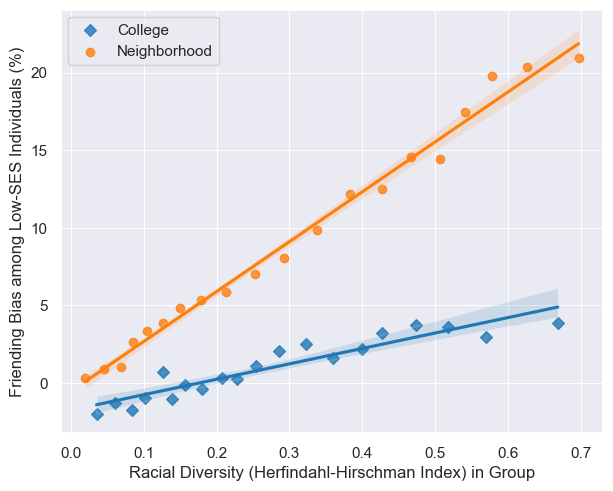

In [89]:
fig, ax = plt.subplots(figsize=(7,5.5))
ax.grid(visible=True, which='major', color='w', linewidth=0.7)
sns.regplot(data=newData5b, x='hhi_weighted_mean', y='bias_own_ses_college_mean', marker='D', label='College', color='#1F77B4')
sns.regplot(data=newData5a, x='hhi_weighted_mean', y='nbhd_bias_zip_mean', marker='o', label='Neighborhood', color='#FF7F0E')
plt.xlabel('Racial Diversity (Herfindahl-Hirschman Index) in Group')
plt.ylabel("Friending Bias among Low-SES Individuals (%)")
legend = plt.legend(loc=2)